# Create a MOC from an astropy Table

In [1]:
from mocpy import MOC, WCS

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle

from astroquery.vizier import Vizier

import matplotlib.pyplot as plt

Let's load a VizieR catalog

In [2]:
viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1  # sets the limit to infinity
table = viz.get_catalogs("I/293/npm2cros")[0]

print(table)

 _RAJ2000   _DEJ2000    NPM2   KLA  RAJ2000   ...  IQ  IN r_Star  mag  tyc
   deg        deg                             ...                 mag     
---------- ---------- -------- --- ---------- ... --- --- ------ ----- ---
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    811 14.20    
339.638333  83.166667 +83.0016 HPM 22 38 33.2 ...   0   0    813 14.20    
349.530833  83.010556 +83.0022 VAR 23 18 07.4 ...   0   0    843    --   T
349.530833  83.010556 +83.0022 SRA 23 18 07.4 ...   0   0      1  9.60   T
323.854167  82.997222 +82.0030 UBV 21 35 25.0 ...   0   0      5 10.08   T
332.107917  82.747500 +82.0055  WD 22 08 25.9 ...   0   0   1012 16.00    
332.933750  82.607778 +82.0059 HPM 22 11 44.1 ...   0   0    811 16.70    
335.088750  82.970833 +82.0065 HPM 22 20 21.3 ...   0   0    811 11.00   T
337.119167  82.763889 +82.0074 UBV 22 28 28.6 ...   0   0      5 10.42   T
337.274583  82.662222 +82.0075 HPM 22 29 05.9 ...   1   0    811 17.40    
       ...        ...    

Let's create a MOC from the coordinates of this table

In [3]:
moc = MOC.from_lonlat(
    table["_RAJ2000"].T * u.deg,
    table["_DEJ2000"].T * u.deg,
    max_norder=6,
)

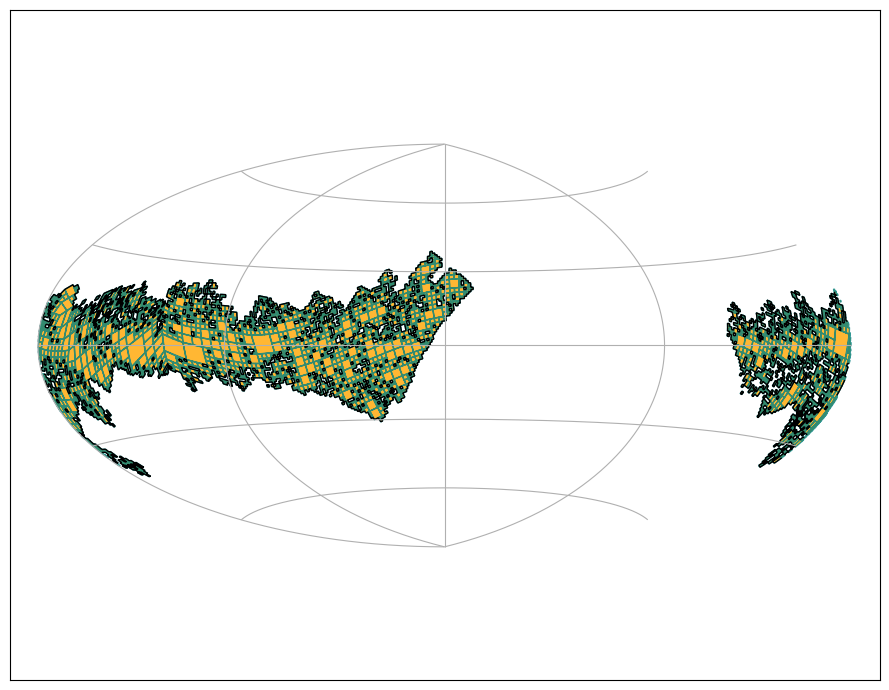

In [4]:
fig = plt.figure(figsize=(9, 7))

with WCS(
    fig,
    fov=270 * u.deg,
    center=SkyCoord(0, 0, unit="deg", frame="galactic"),
    coordsys="galactic",
    rotation=Angle(0, u.degree),
    projection="AIT",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    moc.fill(
        ax=ax,
        wcs=wcs,
        edgecolor="teal",
        facecolor="orange",
        linewidth=1.0,
        fill=True,
        alpha=0.8,
    )
    moc.border(ax=ax, wcs=wcs, color="k")

ax.grid(True)

plt.tight_layout()